# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [1]:
from tensorflow import keras

(trainX, trainY), (testX, testY) = keras.datasets.cifar100.load_data()
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255


trainY = keras.utils.to_categorical(trainY, 100)
testY = keras.utils.to_categorical(testY, 100)

print('Train: X = ', trainX.shape)
print('Train: Y = ', trainY.shape)
print()
print('Test: X = ', testX.shape)
print('Test: Y = ', testY.shape)

Train: X =  (50000, 32, 32, 3)
Train: Y =  (50000, 100)

Test: X =  (10000, 32, 32, 3)
Test: Y =  (10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [3]:
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(128, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(1024))
model_1.add(Activation('relu'))
model_1.add(Dense(100))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0

Обучите созданную модель

In [5]:
batch_size = 256
epochs = 20

history_1 = model_1.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1355 - accuracy: 0.9583 - val_loss: 4.9474 - val_accuracy: 0.3786
Epoch 2/20
196/196 [==============================] - 6s 29ms/step - loss: 0.1205 - accuracy: 0.9625 - val_loss: 5.1435 - val_accuracy: 0.3777
Epoch 3/20
196/196 [==============================] - 6s 29ms/step - loss: 0.1032 - accuracy: 0.9684 - val_loss: 5.4026 - val_accuracy: 0.3785
Epoch 4/20
196/196 [==============================] - 6s 30ms/step - loss: 0.1102 - accuracy: 0.9662 - val_loss: 5.5500 - val_accuracy: 0.3778
Epoch 5/20
196/196 [==============================] - 6s 30ms/step - loss: 0.0937 - accuracy: 0.9716 - val_loss: 5.7527 - val_accuracy: 0.3831
Epoch 6/20
196/196 [==============================] - 6s 28ms/step - loss: 0.0797 - accuracy: 0.9765 - val_loss: 6.0708 - val_accuracy: 0.3818
Epoch 7/20
196/196 [==============================] - 6s 30ms/step - loss: 0.0859 - accuracy: 0.9737 - val_loss: 6.1054 - val_accuracy: 0.3742

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [6]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(1024))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(Dense(100))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

Обучите созданную модель

In [8]:
batch_size = 256
epochs = 20
model_2_history = model_2.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
196/196 [==============================] - 8s 34ms/step - loss: 3.2903 - accuracy: 0.2356 - val_loss: 6.3922 - val_accuracy: 0.0208
Epoch 2/20
196/196 [==============================] - 6s 29ms/step - loss: 2.2613 - accuracy: 0.4225 - val_loss: 5.0706 - val_accuracy: 0.0858
Epoch 3/20
196/196 [==============================] - 6s 31ms/step - loss: 1.6409 - accuracy: 0.5666 - val_loss: 2.8058 - val_accuracy: 0.3281
Epoch 4/20
196/196 [==============================] - 6s 30ms/step - loss: 1.0610 - accuracy: 0.7167 - val_loss: 2.7377 - val_accuracy: 0.3777
Epoch 5/20
196/196 [==============================] - 6s 31ms/step - loss: 0.5256 - accuracy: 0.8743 - val_loss: 2.8468 - val_accuracy: 0.3761
Epoch 6/20
196/196 [==============================] - 6s 31ms/step - loss: 0.1877 - accuracy: 0.9705 - val_loss: 2.6355 - val_accuracy: 0.4225
Epoch 7/20
196/196 [==============================] - 6s 31ms/step - loss: 0.0588 - accuracy: 0.9953 - val_loss: 2.6736 - val_accuracy: 0.4331

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [9]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(1024))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 64)       

Обучите созданную модель

In [10]:
batch_size = 256
epochs = 20
model_3_history = model_3.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
196/196 [==============================] - 6s 28ms/step - loss: 4.1478 - accuracy: 0.0638 - val_loss: 3.6391 - val_accuracy: 0.1470
Epoch 2/20
196/196 [==============================] - 5s 25ms/step - loss: 3.4912 - accuracy: 0.1710 - val_loss: 3.1343 - val_accuracy: 0.2390
Epoch 3/20
196/196 [==============================] - 5s 25ms/step - loss: 3.1416 - accuracy: 0.2330 - val_loss: 2.8871 - val_accuracy: 0.2893
Epoch 4/20
196/196 [==============================] - 5s 25ms/step - loss: 2.9042 - accuracy: 0.2814 - val_loss: 2.6827 - val_accuracy: 0.3295
Epoch 5/20
196/196 [==============================] - 5s 25ms/step - loss: 2.7285 - accuracy: 0.3146 - val_loss: 2.5404 - val_accuracy: 0.3569
Epoch 6/20
196/196 [==============================] - 5s 27ms/step - loss: 2.5864 - accuracy: 0.3433 - val_loss: 2.4840 - val_accuracy: 0.3720
Epoch 7/20
196/196 [==============================] - 5s 26ms/step - loss: 2.4703 - accuracy: 0.3675 - val_loss: 2.3728 - val_accuracy: 0.3960

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [4]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

model_4.add(Dense(1024))
model_4.add(Activation('relu'))

model_4.add(Dropout(0.5))
model_4.add(Dense(100))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)       

Обучите созданную модель

In [5]:
batch_size = 256
epochs = 20
model_4_history = model_4.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
196/196 [==============================] - 20s 39ms/step - loss: 4.0726 - accuracy: 0.1045 - val_loss: 6.2715 - val_accuracy: 0.0224
Epoch 2/20
196/196 [==============================] - 7s 33ms/step - loss: 3.3900 - accuracy: 0.1948 - val_loss: 4.1438 - val_accuracy: 0.1047
Epoch 3/20
196/196 [==============================] - 6s 32ms/step - loss: 3.0713 - accuracy: 0.2488 - val_loss: 3.0134 - val_accuracy: 0.2691
Epoch 4/20
196/196 [==============================] - 6s 31ms/step - loss: 2.8056 - accuracy: 0.2993 - val_loss: 2.7409 - val_accuracy: 0.3164
Epoch 5/20
196/196 [==============================] - 7s 33ms/step - loss: 2.5910 - accuracy: 0.3426 - val_loss: 2.5863 - val_accuracy: 0.3524
Epoch 6/20
196/196 [==============================] - 7s 34ms/step - loss: 2.4106 - accuracy: 0.3788 - val_loss: 2.3589 - val_accuracy: 0.3936
Epoch 7/20
196/196 [==============================] - 6s 31ms/step - loss: 2.2524 - accuracy: 0.4116 - val_loss: 2.4063 - val_accuracy: 0.388

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

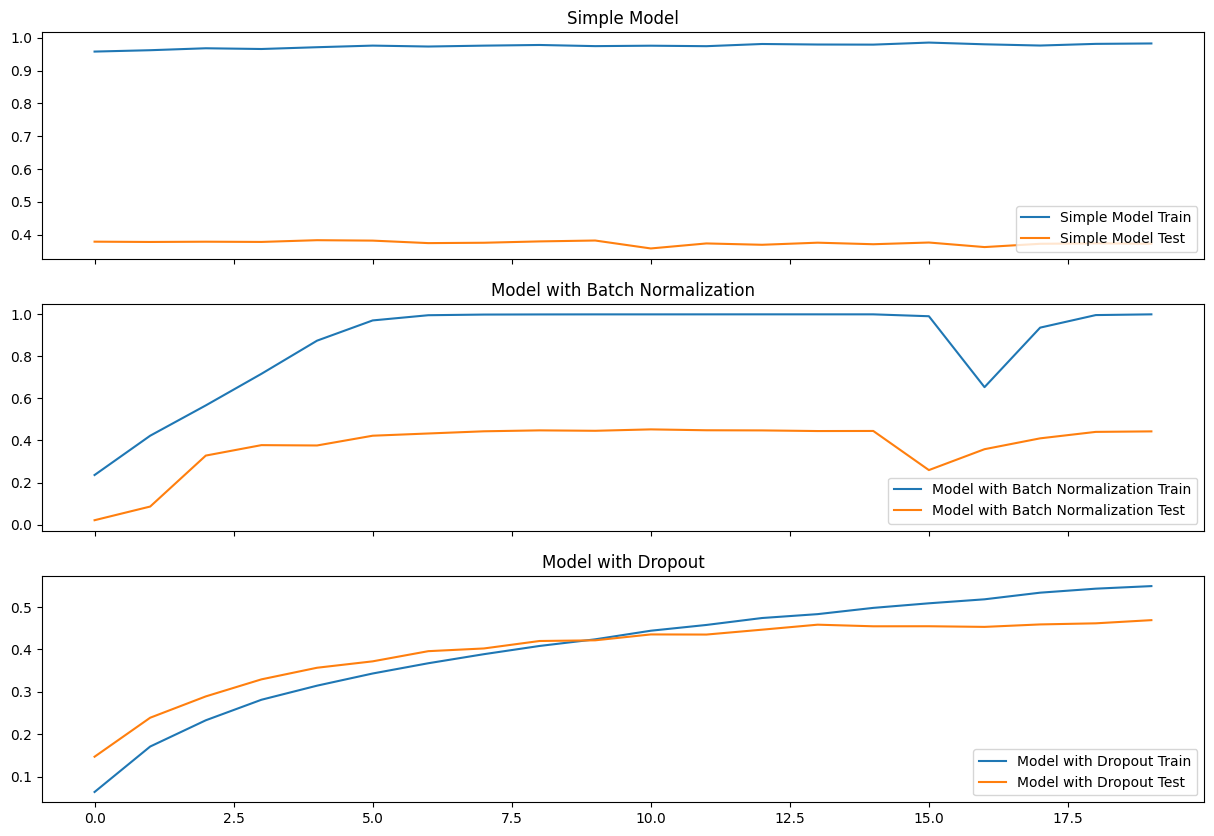

In [20]:
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt) = plt.subplots(3, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model1Plt.set_title("Simple Model")
model1Plt.plot(history_1.history['accuracy'])
model1Plt.plot(history_1.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(model_2_history.history['accuracy'])
model2Plt.plot(model_2_history.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(model_3_history.history['accuracy'])
model3Plt.plot(model_3_history.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")


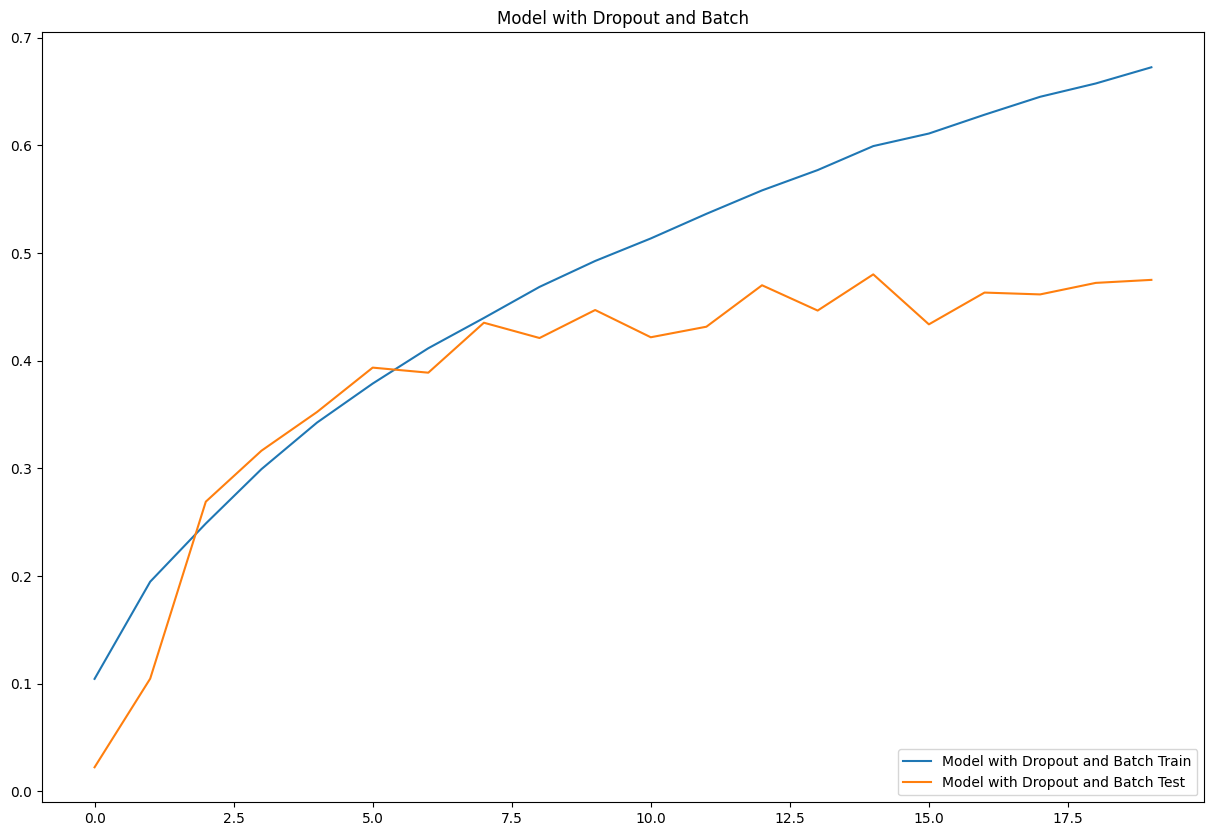

In [6]:
import matplotlib.pyplot as plt
fig, (model4Plt) = plt.subplots(1, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(model_4_history.history['accuracy'])
model4Plt.plot(model_4_history.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")

Ваши выводы

Как видно из модели, из графиков, нормалищация батчами не значительно изменяет обучение и конечную точность модели. Dropout, а также Dropout совмещенный с нормализацией батчами значительно увеличивают эффективность модели, но в то же самое время увеличивают и количество эпох, необходимое для ее обучения

Ваш итог

Самую высокую точность показала модели использующая нормализацию батчами и дропаут, обучавшаяся в течение 20 эпох. 

Accuracy 0.47 